<a href="https://colab.research.google.com/github/seym0/biocad-ml-bioinf-task/blob/main/valeeva_biocad_ml_bioinf_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=pink size=5>
Описание тестового задания</font>

Реализовать простую модель машинного обучения, ĸоторая предсĸазывает знаĸ изменения свободной энергии связывания (ddG) на основе данных из базы SKEMPI 2 0.

Необходимо продемонстрировать, что модель обучается (ĸачеством модели можно пренебречь в рамĸах тестового задания). Если не удаётся обучить модель или добиться ожидаемой обучаемости, просьба всё равно предоставить весь разработанный ĸод и описать проделанные шаги. Это позволит нам оценить ваш подход ĸ решению задачи и уровень владения инструментами для работы с данными и моделями машинного обучения.

<font color=pink size=5>
Требования ĸ выполненной работе:</font>

1. Код должен быть загружен в виде репозитория на GitHub с публичным доступом.
2. Должны быть даны ĸомментарии ĸ ĸоду и описан ход ваших размышлений.


# Выполнение задания

## Загрузка данных из базы SKEMPI 2.0

In [ ]:
! wget https://life.bsc.es/pid/skempi2/database/download/skempi_v2.csv

--2025-05-04 17:07:40--  https://life.bsc.es/pid/skempi2/database/download/skempi_v2.csv
Resolving life.bsc.es (life.bsc.es)... 84.88.52.107
Connecting to life.bsc.es (life.bsc.es)|84.88.52.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1602208 (1.5M) [text/csv]
Saving to: ‘skempi_v2.csv’

skempi_v2.csv       100%[===================>]   1.53M  1.17MB/s    in 1.3s    

2025-05-04 17:07:43 (1.17 MB/s) - ‘skempi_v2.csv’ saved [1602208/1602208]



In [ ]:
! wget https://life.bsc.es/pid/skempi2/database/download/SKEMPI2_PDBs.tgz

--2025-05-04 17:07:43--  https://life.bsc.es/pid/skempi2/database/download/SKEMPI2_PDBs.tgz
Resolving life.bsc.es (life.bsc.es)... 84.88.52.107
Connecting to life.bsc.es (life.bsc.es)|84.88.52.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30482090 (29M) [application/x-compressed-tar]
Saving to: ‘SKEMPI2_PDBs.tgz’

SKEMPI2_PDBs.tgz    100%[===================>]  29.07M  7.88MB/s    in 3.7s    

2025-05-04 17:07:47 (7.88 MB/s) - ‘SKEMPI2_PDBs.tgz’ saved [30482090/30482090]



In [ ]:
! tar -xzf /content/SKEMPI2_PDBs.tgz

## imports

In [ ]:
! pip install biopython -q
! pip show biopython

Name: biopython
Version: 1.85
Summary: Freely available tools for computational molecular biology.
Home-page: https://biopython.org/
Author: The Biopython Contributors
Author-email: biopython@biopython.org
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy
Required-by: 


In [ ]:
! pip install transformers torch -q

```
Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers
```



```
Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
```

In [ ]:
! pip install lazypredict -q
! pip show lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
Name: lazypredict
Version: 0.2.16
Summary: Lazy Predict help build a lot of basic models without much code and helps understa

In [ ]:
import pandas as pd
import numpy as np

import re
import os

import seaborn as sns
import matplotlib.pyplot as plt

from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import is_aa
from Bio.SeqUtils import seq1\

import torch
from transformers import EsmModel, EsmTokenizer

from scipy.spatial.distance import cosine

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from lazypredict.Supervised import LazyClassifier

## Чтение данных

In [ ]:
data = pd.read_csv('/content/skempi_v2.csv', delimiter=';')

### Описание столбцов:

1) **#Pdb** - Идентификатор комплекса в PDB. Указывает код PDB (4 символа) и цепи двух взаимодействующих субъединиц, разделённые подчёркиванием (например, 1CSE_E_I для цепей E и I).

2) **Mutation(s)_PDB** - Мутация(и), соответствующая нумерации остатков в PDB.Формат:  

* Первый символ - однобуквенный код исходной аминокислоты.  
* Второй символ - идентификатор цепи.  
* С третьего по предпоследний символы - номер остатка (может включать код вставки, если применимо).  
* Последний символ - однобуквенный код мутантной аминокислоты.Множественные мутации разделяются запятыми (например, LI45G для замены лейцина на глицин в цепи I, остаток 45).

3) **Mutation(s)_cleaned** - Мутация(и) в стандартизированном формате. Аналогична Mutation(s)_PDB, но использует очищенную нумерацию остатков, устраняющую несоответствия в PDB (например, LI38G вместо LI45G из-за смещения нумерации). Формат тот же: исходная аминокислота, цепь, номер остатка, мутантная аминокислота. Множественные мутации разделяются запятыми.

4) **iMutation_Location(s)** - Местоположение мутации(й) относительно сайта связывания. Указывает расположение мутации:  

* COR (core) - в ядре сайта связывания.  
* SUP (support) - в поддерживающей области.  
* RIM (rim) - на краю сайта связывания.  
* INT (interior) - внутри белка, вне сайта.  
* SUR (surface) - на поверхности, вне сайта. Для множественных мутаций указывается через запятые в порядке мутаций (например, COR для LI38G).

5) **Hold_out_type** - Тип данных, используемых для валидации. Указывает категорию комплекса для разделения данных на обучающую и тестовую выборки (протеаза/ингибитор (Pr/PI), антитело-антиген (AB/AG) или pMHC-TCR (TCR/pMHC)). Используется для кросс-валидации.

6) **Hold_out_proteins** - Белки, исключённые для валидации. Указывает классы белков, к которым относится комплекс, для исключения из обучающей выборки (например, Pr/PI). Совпадает с Hold_out_type в данном случае.

7) **Affinity_mut (M)** - Константа сродства связывания мутантного комплекса.Указывает измеренное сродство в молярных единицах (M) для мутантного комплекса (например, 5.26E-11). Может включать знаки неравенства для приблизительных значений.

8) **Affinity_mut_parsed** - Разобранное значение сродства мутантного комплекса.Числовое представление Affinity_mut в стандартном формате (например, 5.260000e-11). Используется для единообразной обработки данных.

9) **Affinity_wt (M)** - Константа сродства связывания дикого типа (wild type). Указывает сродство для немутантного комплекса в молярных единицах (например, 1.12E-12). Может содержать знаки неравенства.

10) **Affinity_wt_parsed** - Разобранное значение сродства дикого типа.Числовое представление Affinity_wt в стандартном формате (например, 1.120000e-12). Обеспечивает единообразие данных.

11) **Reference** - Ссылка на источник данных. Указывает идентификатор публикации, где были получены данные. Ссылается на оригинальное исследование.

12) **Protein 1** - Название первого белка в комплексе. Указывает название одного из взаимодействующих белков.

13) **Protein 2** - Название второго белка в комплексе.Указывает название второго взаимодействующего белка.

14) **Temperature** - Температура эксперимента. Указывает температуру, при которой проводились измерения, в Кельвинах (например, 294). Если не указана, предполагается 298 К.

15) **kon_mut (M^(-1)s^(-1))** - Константа скорости ассоциации мутантного комплекса. Указывает скорость образования мутантного комплекса (в M⁻¹s⁻¹). Иногда данные отсутствуют (NaN).

16) **kon_mut_parsed** - Разобранное значение скорости ассоциации мутанта.Числовое представление kon_mut в стандартном формате. Иногда данные отсутствуют (NaN).

17) **kon_wt (M^(-1)s^(-1))** - Константа скорости ассоциации дикого типа.Указывает скорость образования комплекса дикого типа (в M⁻¹s⁻¹). Иногда данные отсутствуют (NaN).

18) **kon_wt_parsed** - Разобранное значение скорости ассоциации дикого типа. Числовое представление kon_wt. Иногда данные отсутствуют (NaN).

19) **koff_mut (s^(-1))** - Константа скорости диссоциации мутантного комплекса. Указывает скорость распада мутантного комплекса (в s⁻¹). Иногда данные отсутствуют (NaN).

20) **koff_mut_parsed** - Разобранное значение скорости диссоциации мутанта. Числовое представление koff_mut. Иногда данные отсутствуют (NaN).

21) **koff_wt (s^(-1))** - Константа скорости диссоциации дикого типа.Указывает скорость распада комплекса дикого типа (в s⁻¹). Иногда данные отсутствуют (NaN).

22) **koff_wt_parsed** - Разобранное значение скорости диссоциации дикого типа.Числовое представление koff_wt. Иногда данные отсутствуют (NaN).

23) **dH_mut (kcal mol^(-1))** - Энтальпия связывания мутантного комплекса.Указывает изменение энтальпии при образовании мутантного комплекса (в ккал/моль). Иногда данные отсутствуют (NaN).

24) **dH_wt (kcal mol^(-1))** - Энтальпия связывания дикого типа.Указывает изменение энтальпии для комплекса дикого типа (в ккал/моль). Иногда данные отсутствуют (NaN).

25) **dS_mut (cal mol^(-1) K^(-1))** - Энтропия связывания мутантного комплекса.Указывает изменение энтропии для мутантного комплекса (в кал/моль/К). Иногда данные отсутствуют (NaN).

26) **dS_wt (cal mol^(-1) K^(-1))** - Энтропия связывания дикого типа.Указывает изменение энтропии для комплекса дикого типа (в кал/моль/К). Иногда данные отсутствуют (NaN).

27) **Notes** - Дополнительные примечания. Содержит информацию об особенностях эксперимента или данных. Может быть пустым.

28) **Method** - Метод измерения. Указывает экспериментальный метод, использованный для получения данных.

29) **SKEMPI version** - Версия базы данных SKEMPI.Указывает версию базы данных, к которой относится запись (например, 1 для SKEMPI v1).


## Обработка данных

Создание рабочего датафрейма

In [ ]:
df = data.copy()
df = df[[
    '#Pdb',
    'Mutation(s)_cleaned',
    'Hold_out_type',
    'Hold_out_proteins',
    'Affinity_mut_parsed',
    'Affinity_wt_parsed',
    'Temperature',
         ]]

# разделим колонку #Pdb на несколько колонок: идентификатор комплекса, идентификаторы цепи белка 1, идентификаторы цепи белка 2
df[['PDB_ID', 'Chains_1', 'Chains_2']] = df['#Pdb'].str.split('_', expand=True)

# разделим колонку Mutation(s)_cleaned на несколько колонок: исходная аминокислота (в однобуквенном формате), идентификатор цепи, номер остатка, мутантная аминокислота
def parse_mutation(mutation):
    pattern = r'([A-Z])([A-Z])(\d+)([A-Z])'

    if pd.isna(mutation):
        return pd.Series([None, None, None, None], index=['AA', 'Chain_AA', 'res_num', 'AA_mut'])

    match = re.match(pattern, mutation)
    if match:
        return pd.Series({
            'AA': match.group(1),
            'Chain_AA': match.group(2),
            'res_num': int(match.group(3)),
            'AA_mut': match.group(4)
        })
    else:
        return pd.Series([None, None, None, None], index=['AA', 'Chain_AA', 'res_num', 'AA_mut'])


df[['AA', 'Chain_AA', 'res_num', 'AA_mut']] = df['Mutation(s)_cleaned'].apply(parse_mutation)

# выберем нужные колонки и расположим их в более удобном порядке
df = df[['PDB_ID', 'Chains_1', 'Chains_2',
         'AA', 'Chain_AA', 'res_num', 'AA_mut',
         'Hold_out_type', 'Hold_out_proteins',
         'Affinity_mut_parsed', 'Affinity_wt_parsed',
         'Temperature']]

⚠️ **Для упрощения задачи я буду работать только с комплексами, субъединицы которых состоят только из 1 цепи**

In [ ]:
# фильтруем датафрейм по условию (1 цепь)

df = df[(df['Chains_1'].apply(lambda x: len(x)) == 1) & (df['Chains_2'].apply(lambda x: len(x)) == 1)]

## Вычисление dG и ddG

В базе данных предоставлены значения Affinity (или Kd - константы связывания)

Необходимо пересчитать константу связывания в энергию связывания по следующей формуле:

ΔG = RT ln Kd

А также изменение свободной энергии между wild type и mut:

ΔΔG = ΔGmut-ΔGwt

In [ ]:
# очищаем NaN в константах связывания
df = df[df['Affinity_mut_parsed'].notna()]
df = df[df['Affinity_wt_parsed'].notna()]

# исправим некоторые значения в колонке температуры
df['Temperature'] = df['Temperature'].replace(to_replace='298(assumed)', value=298)
df['Temperature'] = df['Temperature'].astype('float')

# уберем отсутствующие значения температуры (4 строки)
df = df[df['Temperature'].notna()]

# вычисление энергии связывания
df.loc[:, 'dG_wt'] = 8.314 * df.loc[:, 'Temperature'] * np.log(df.loc[:, 'Affinity_wt_parsed'])
df.loc[:, 'dG_mut'] = 8.314 * df.loc[:, 'Temperature'] * np.log(df.loc[:, 'Affinity_mut_parsed'])

# вычисление изменения свободной энергии связывания
df.loc[:, 'ddG'] = df.loc[:, 'dG_mut'] - df.loc[:, 'dG_wt']

<Axes: xlabel='ddG', ylabel='Count'>

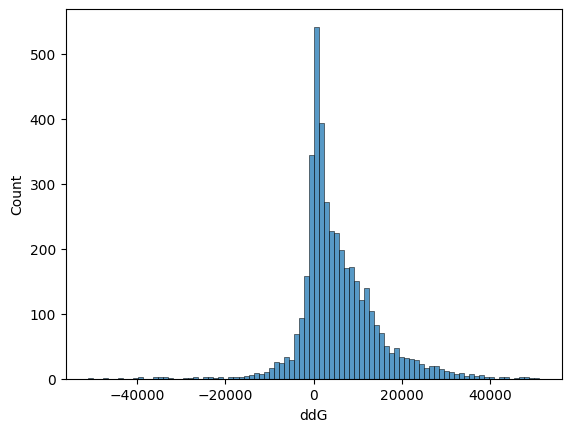

In [ ]:
# распределение ddG
sns.histplot(df['ddG'])

In [ ]:
# создаем таргетную колонку со знаком изменения свободной энергии
df['ddG_sign'] = df['ddG'].apply(lambda x: 1 if x > 0.1 else (-1 if x < -0.1 else 0))

In [ ]:
df['ddG_sign'].value_counts()

,count
ddG_sign,
1,3228
-1,866
0,71


Значительная часть мутаций является дестабилизирующей (ddG = 1)

## Работа с PDB

Получение аминокислотных последовательностей для цепей

In [ ]:
# Функция для извлечения аминокислотной последовательности из цепи
def get_chain_sequence(structure, chain_id):
    try:
        for chain in structure[0]:
            if chain.id == chain_id:
                seq = [seq1(aa.resname) for aa in chain.get_residues() if is_aa(aa)]
                if seq:
                    # print(f"Found sequence for chain {chain_id}: {seq[:20]}...")
                    return "".join(seq)
                else:
                    print(f"No valid residues found for chain {chain_id}")
        print(f"Chain {chain_id} not found in structure")
        return None
    except Exception as e:
        print(f"Error in get_chain_sequence for chain {chain_id}: {e}")
        return None

In [ ]:
# Функция для парсинга PDB-файла и извлечения последовательностей для цепей
def parse_pdb_sequences(pdb_id, chain_1, chain_2, chain_aa):
    try:
        # print(f"Processing PDB: {pdb_id}, Chain_1: {chain_1}, Chain_2: {chain_2}, Chain_AA: {chain_aa}")

        # Формируем путь к PDB-файлу
        pdb_file = os.path.join(pdb_directory, f"{pdb_id}.pdb")
        if not os.path.exists(pdb_file):
            print(f"PDB file {pdb_file} not found")
            return pd.Series([None, None], index=['seq_chain_1', 'seq_chain_2'])

        # Парсим PDB-файл
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure(pdb_id, pdb_file)

        # Извлекаем последовательности для chain_1 и chain_2
        seq_1 = get_chain_sequence(structure, chain_1) if chain_1 else None
        seq_2 = get_chain_sequence(structure, chain_2) if chain_2 else None

        return pd.Series({
            'seq_chain_1': seq_1,
            'seq_chain_2': seq_2
        })
    except Exception as e:
        print(f"Error processing PDB {pdb_id}: {e}")
        return pd.Series([None, None], index=['seq_chain_1', 'seq_chain_2'])

In [ ]:
# путь к директории с PDB-файлами
pdb_directory = '/content/PDBs'

sequences = df.apply(lambda row: parse_pdb_sequences(row['PDB_ID'],
                                                     row.get('Chains_1'),
                                                     row.get('Chains_2'),
                                                     row['Chain_AA']), axis=1)

In [ ]:
# добавляем новые столбцы (seq_chain_1 и seq_chain_2) в DataFrame
df = pd.concat([df, sequences], axis=1)
df.head()

,PDB_ID,Chains_1,Chains_2,AA,Chain_AA,res_num,AA_mut,Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,Affinity_wt_parsed,Temperature,dG_wt,dG_mut,ddG,ddG_sign,seq_chain_1,seq_chain_2
0,1CSE,E,I,L,I,38,G,Pr/PI,Pr/PI,5.260000e-11,1.120000e-12,294.0,-67261.935891,-57852.816595,9409.119296,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...
1,1CSE,E,I,L,I,38,S,Pr/PI,Pr/PI,8.330000e-12,1.120000e-12,294.0,-67261.935891,-62357.330846,4904.605045,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...
2,1CSE,E,I,L,I,38,P,Pr/PI,Pr/PI,1.020000e-07,1.120000e-12,294.0,-67261.935891,-39349.315210,27912.620681,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...
3,1CSE,E,I,L,I,38,I,Pr/PI,Pr/PI,1.720000e-10,1.120000e-12,294.0,-67261.935891,-54956.843900,12305.091991,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...
4,1CSE,E,I,L,I,38,D,Pr/PI,Pr/PI,1.920000e-09,1.120000e-12,294.0,-67261.935891,-49059.721368,18202.214523,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...


In [ ]:
# функция для создания мутированной последовательности
def mutate_sequence(row):
    seq = row['seq_chain_aa']
    aa = row['AA']
    res_num = row['res_num']
    aa_mut = row['AA_mut']

    # проверяем, что res_num в пределах последовательности
    pos = int(res_num) - 1
    if pos < 0 or pos >= len(seq):
        print(f"Invalid residue number {res_num} for PDB {row['PDB_ID']}, sequence length {len(seq)}")
        return None

    # проверяем, что исходная аминокислота совпадает
    if seq[pos] != aa:
        print(f"Mismatch in PDB {row['PDB_ID']}, chain {row['Chain_AA']}, pos {res_num}: expected {aa}, found {seq[pos]}")
        return None

    # создаём мутированную последовательность
    seq_list = list(seq)
    seq_list[pos] = aa_mut
    mutated_seq = ''.join(seq_list)
    return mutated_seq

In [ ]:
# Chain_no_mutation - цепь, в которой не происходит мутация
df['Chain_no_mutation'] = df.apply(
    lambda row: row['Chains_1'] if row['Chain_AA'] == row['Chains_2'] else row['Chains_2'] if row['Chain_AA'] == row['Chains_1'] else None,
    axis=1
)

# seq_no_mutation - последовательность цепи, в которой не будет происходить мутация
df['seq_no_mutation'] = df.apply(
    lambda row: row['seq_chain_1'] if row['Chain_no_mutation'] == row['Chains_1'] else row['seq_chain_2'] if row['Chain_no_mutation'] == row['Chains_2'] else None,
    axis=1
)

# seq_chain_aa - последовательность, в которой будет происходить мутация
df['seq_chain_aa'] = df.apply(
    lambda row: row['seq_chain_1'] if row['Chain_AA'] == row['Chains_1'] else row['seq_chain_2'] if row['Chain_AA'] == row['Chains_2'] else None,
    axis=1
)

# seq_chain_aa_mut - последовательность с мутацией
df['seq_chain_aa_mut'] = df.apply(mutate_sequence, axis=1)

In [ ]:
# сохраним обработанный рабочий датасет со всеми колонками
df.to_csv('df_processed.csv', index=False)

In [ ]:
df_processed = pd.read_csv('/content/df_processed.csv')
df_processed.head(2)

,PDB_ID,Chains_1,Chains_2,AA,Chain_AA,res_num,AA_mut,Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,...,dG_wt,dG_mut,ddG,ddG_sign,seq_chain_1,seq_chain_2,Chain_no_mutation,seq_no_mutation,seq_chain_aa,seq_chain_aa_mut
0,1CSE,E,I,L,I,38,G,Pr/PI,Pr/PI,5.260000e-11,...,-67261.935891,-57852.816595,9409.119296,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTGDLRYNRVR...
1,1CSE,E,I,L,I,38,S,Pr/PI,Pr/PI,8.330000e-12,...,-67261.935891,-62357.330846,4904.605045,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTSDLRYNRVR...


In [ ]:
df_processed

,PDB_ID,Chains_1,Chains_2,AA,Chain_AA,res_num,AA_mut,Hold_out_type,Hold_out_proteins,Affinity_mut_parsed,...,dG_wt,dG_mut,ddG,ddG_sign,seq_chain_1,seq_chain_2,Chain_no_mutation,seq_no_mutation,seq_chain_aa,seq_chain_aa_mut
0,1CSE,E,I,L,I,38,G,Pr/PI,Pr/PI,5.260000e-11,...,-67261.935891,-57852.816595,9409.119296,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTGDLRYNRVR...
1,1CSE,E,I,L,I,38,S,Pr/PI,Pr/PI,8.330000e-12,...,-67261.935891,-62357.330846,4904.605045,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTSDLRYNRVR...
2,1CSE,E,I,L,I,38,P,Pr/PI,Pr/PI,1.020000e-07,...,-67261.935891,-39349.315210,27912.620681,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTPDLRYNRVR...
3,1CSE,E,I,L,I,38,I,Pr/PI,Pr/PI,1.720000e-10,...,-67261.935891,-54956.843900,12305.091991,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTIDLRYNRVR...
4,1CSE,E,I,L,I,38,D,Pr/PI,Pr/PI,1.920000e-09,...,-67261.935891,-49059.721368,18202.214523,1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,E,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTDDLRYNRVR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,2WPT,A,B,F,B,79,A,NaN,"2WPT_A_B,2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1...",7.410000e-05,...,-34720.598613,-23561.945153,11158.653460,1,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,A,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...
4161,2WPT,A,B,D,A,30,A,NaN,"2WPT_A_B,2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1...",6.210000e-07,...,-34720.598613,-35409.297375,-688.698762,-1,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,B,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,KHSISDYTEAEFLEFVKKIARAEGATECDANKLVREFERLTEHPDG...
4162,2WPT,A,B,N,A,31,A,NaN,"2WPT_A_B,2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1...",6.490000e-07,...,-34720.598613,-35300.032399,-579.433786,-1,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,B,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,KHSISDYTEAEFLEFVKKIARAEGATECDDAKLVREFERLTEHPDG...
4163,2WPT,A,B,S,B,77,A,NaN,"2WPT_A_B,2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1...",7.090000e-07,...,-34720.598613,-35080.958522,-360.359908,-1,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,A,KHSISDYTEAEFLEFVKKIARAEGATECDDNKLVREFERLTEHPDG...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...,PGKATGKGKPVGDKWLDDAGKDSGAPIPDRIADKLRDKEFKSFDDF...


In [ ]:
# создадим датасет с нужными колонками для обучения модели

df_to_model = df_processed[['seq_no_mutation',
                            'seq_chain_aa_mut',
                            'seq_chain_aa',
                            'ddG_sign']]

df_to_model.to_csv('df_to_model.csv', index=False)

## Получение предсказаний

In [ ]:
# загрузим датасет для обучения
df_to_model = pd.read_csv('/content/df_to_model.csv')
df_to_model.head(5)

,seq_no_mutation,seq_chain_aa_mut,seq_chain_aa,ddG_sign
0,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTGDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,1
1,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTSDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,1
2,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTPDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,1
3,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTIDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,1
4,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTDDLRYNRVR...,KSFPEVVGKTVDQAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVR...,1


### Распределение классов в целевой переменной:

1 - ddG > 0

0 - ddG = 0

-1 - ddG < 0

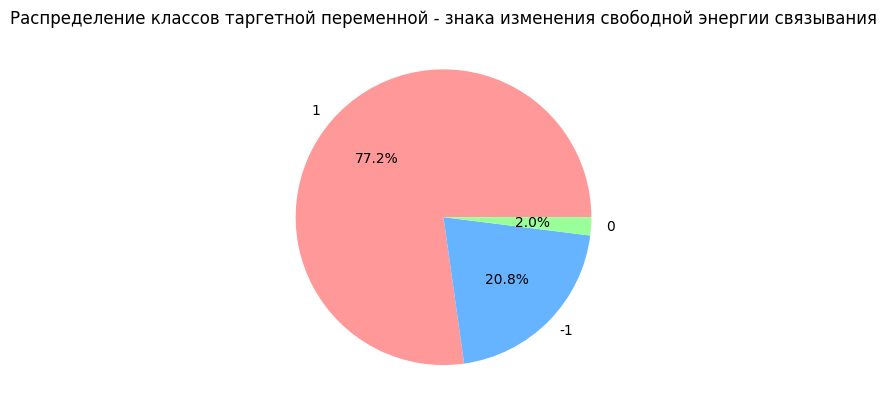

In [ ]:
plt.title("Распределение классов таргетной переменной - знака изменения свободной энергии связывания")

colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(np.round(df_to_model['ddG_sign'].value_counts() / len(df_to_model['ddG_sign']) * 100),
    labels=df_to_model['ddG_sign'].unique(),
    autopct='%1.1f%%',
    colors=colors)

plt.show()

Наблюдается дисбаланс классов

### Создание эмбеддингов

In [ ]:
! pip show transformers

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [ ]:
! pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [ ]:
tokenizer = EsmTokenizer.from_pretrained("facebook/esm2_t12_35M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t12_35M_UR50D")

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t12_35M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Я выбрала косинусное расстояние между эмбеддингами, чтобы численно измерить изменения в последовательностях до мутации и после мутации

In [ ]:
# Функция для получения эмбеддинга
def get_embedding(sequence):
    if pd.isna(sequence):
        print(f"Skipping embedding for NaN sequence")
        return np.zeros(480)
    try:
        inputs = tokenizer(sequence, return_tensors="pt", truncation=True, max_length=1024)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
        # Проверяем форму эмбеддинга
        if embedding.ndim != 1:
            embedding = embedding.flatten()
        if embedding.shape[0] != 480:
            # print(f"Warning: Embedding shape {embedding.shape} for sequence {sequence[:20]}...")
            embedding = np.zeros(480)
        # print(f"Generated embedding for sequence: {sequence[:20]}... (shape: {embedding.shape})")
        return embedding
    except Exception as e:
        print(f"Error generating embedding for sequence {sequence[:20]}...: {e}")
        return np.zeros(480)

In [ ]:
# Получаем эмбеддинги для seq_chain_aa и seq_chain_aa_mut

df_to_model['embedding_aa'] = df_to_model['seq_chain_aa'].apply(get_embedding)
df_to_model['embedding_aa_mut'] = df_to_model['seq_chain_aa_mut'].apply(get_embedding)

In [ ]:
df_to_model.to_pickle("df_with_embeds.pkl")

In [ ]:
# расчет косинусного расстояния между эмбеддингами последовательностей с мутацией и без

df_to_model['cosine_distance'] = df_to_model.apply(
    lambda row: cosine(row['embedding_aa'], row['embedding_aa_mut']) if not np.all(row['embedding_aa'] == 0) and not np.all(row['embedding_aa_mut'] == 0) else 0,
    axis=1
)

### X, y

In [ ]:
X = np.array(df_to_model['cosine_distance'])
y = np.array(df_to_model['ddG_sign'])

# для Random Classifier'а
X = X.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение Random Forest Classifier

In [ ]:
# Обучаем модель

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report with ESM-2 embeddings:")
print(classification_report(y_test, y_pred))

Classification Report with ESM-2 embeddings:
              precision    recall  f1-score   support

          -1       0.39      0.30      0.34       168
           0       0.20      0.11      0.14        18
           1       0.82      0.87      0.84       647

    accuracy                           0.74       833
   macro avg       0.47      0.43      0.44       833
weighted avg       0.72      0.74      0.73       833



Выводы: Модель ожидаемо хорошо предсказывает класс 1 (ddG > 0), так как этих значений в данных больше всего (дисбаланс классов в пункте распределение классов)

# Результаты и идеи для улучшения качества модели:

**Результаты:**

1) Была обработана база данных SKEMPI v2.0

2) После обработки были отфильтрованы данные комплексов, субъединицы которых имеют только 1 цепь

3) Были обработаны PDB комплексы: получены однобуквенные аминокислотные последовательности цепей, а также произведена мутация

4) Получены эмбеддинги с помощью предуобученной белковой модели facebook/esm2_t12_35M_UR50D

5) В качестве признака для предсказания знака изменения свободной энергии связывания использовано косинусное расстояние между эмбеддингами последовательностей цепей после мутации и до мутации

6) Модель Random Forest Classifier переобучилась из-за дисбаланса классов (accuracy = 0.74)

 **Идеи для улучшения качества модели:**

1) Сохранить данные
* Взять в работу комплексы, у которых несколько цепей: изменить код обработки данных SKEMPI

2) Использовать другие предобученные белковые языковые модели

3) Считать дескрипторы по аминокислотным последовательностям
* Можно использовать protPy

4) Использовать кросс-валидацию на основе типа комплекса (protease-inhibitor (Pr/PI), antibody-antigen (AB/AG) or pMHC-TCR (TCR/pMHC))

5) Использовать другие модели для классификации
